# Prac 3


## Q1 Multivariate Parametric estimation
糖尿病数据集，输入数据特征8维，二分类问题

In [2]:
import pandas
from scipy.stats import multivariate_normal

In [44]:
pima_data = pandas.read_csv('pima_indians_diabetes.csv')
pima_data_train = pima_data.loc[:499,:]
pima_data_test = pima_data.loc[500:,:]

In [11]:
pos_data = pima_data_train[pima_data_train['9']=='pos'] 
neg_data = pima_data_train[pima_data_train['9']=='neg']
# 对postive和negative的数据分别计算平均和标准差
mu1 = pos_data.mean()
mu2 = neg_data.mean()
S1 = pos_data.cov()
S2 = neg_data.cov()

In [13]:
# 根据平均和标准差，基于假设的高斯分布得到分布函数（似然），即norm1为阳性True，nrom2为阴性False
norm1 = multivariate_normal(mu1, S1)
norm2 = multivariate_normal(mu2,S2)

# 根据postive和negative的数据进行先验的计算
P1 = len(pos_data)/(len(pos_data)+len(neg_data))
P2 = len(neg_data)/(len(pos_data)+len(neg_data))

In [38]:
# 去掉第九列的label，得到八维的train input
pima_data_train_X = pima_data_train.drop(['9'], axis=1)

# 似然*先验，得到分子
pdf1_x = norm1.pdf(pima_data_train_X)*P1
pdf2_x = norm2.pdf(pima_data_train_X)*P2
# 分子除分母，二分类问题中分母为似然1*先验1+似然2*先验2
post1 = pdf1_x/(pdf1_x + pdf2_x)
post2 = pdf2_x/(pdf1_x + pdf2_x)

In [51]:
pred = post1>post2
pred

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
        True, False, False,  True, False,  True,  True, False,  True,
       False, False,  True, False, False,  True, False,  True, False,
       False, False, False,  True,  True, False,  True, False, False,
       False,  True,  True, False,  True,  True, False, False, False,
       False, False,

In [36]:
labels = pima_data_train['9']
# 为了与上述True与False对比，将原数据的pos和neg转换成True和False
labels[labels=='pos'] = True
labels[labels=='neg'] = False

C:\Users\J.G\Anaconda2\envs\py3k\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\J.G\Anaconda2\envs\py3k\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\J.G\Anaconda2\envs\py3k\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel p

Training error, prac乘100用百分比表示

In [22]:
# 比较正确预测的个数
(sum((labels == pred))/len(pred))*100

75.4

Test error

In [45]:
pima_data_test_X = pima_data_test.drop(['9'], axis=1)
pdf1_x = norm1.pdf(pima_data_test_X)*P1
pdf2_x = norm2.pdf(pima_data_test_X)*P2
post1 = pdf1_x/(pdf1_x + pdf2_x)
post2 = pdf2_x/(pdf1_x + pdf2_x)

pred = post1>post2

In [24]:
labels = pima_data_test['9']
labels[labels=='pos'] = True
labels[labels=='neg'] = False

C:\Users\J.G\Anaconda2\envs\py3k\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\J.G\Anaconda2\envs\py3k\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
(sum((labels == pred))/len(pred))*100

77.98507462686567

# 上述是用的高斯判别，如下是二次判别QDA

In [26]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [48]:
pima_data_train = pima_data.loc[:499,:]
pima_data_train_X = pima_data_train.drop(['9'], axis=1)
labels = pima_data_train['9']
labels

0      pos
1      neg
2      pos
3      neg
4      pos
      ... 
495    neg
496    neg
497    neg
498    pos
499    neg
Name: 9, Length: 500, dtype: object

In [49]:
labels_test = pima_data_test['9']
qda = QuadraticDiscriminantAnalysis()
qd = qda.fit(pima_data_train_X,labels).predict(pima_data_test_X)
print('正确率：',str(round(qda.score(pima_data_test_X,labels_test),2)))

正确率： 0.78


# 再来个线性判别LDA

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf=LinearDiscriminantAnalysis()
clf.fit(pima_data_train_X,labels).predict(pima_data_test_X)
print('正确率：',str(round(clf.score(pima_data_test_X,labels_test),2)))

正确率： 0.81


## Q3 Nonparametric density estimation 比较

### Histograms 和
### Kernel density estimation

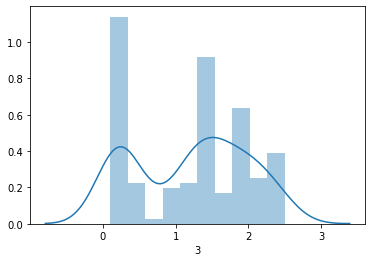

In [66]:
import seaborn as sns 
iris_data = pandas.read_csv('iris.txt',header=None)
iris_data = iris_data[3]
# iris_data.hist(bins=10)
# distplot()是hist加强版seaborn，kdeplot(shade=True)为密度曲线图
sns.distplot(iris_data, bins=10)

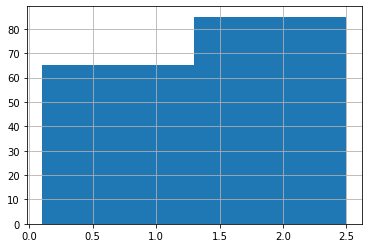

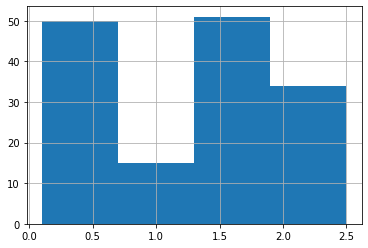

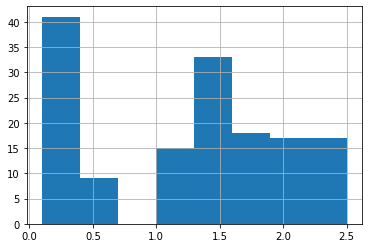

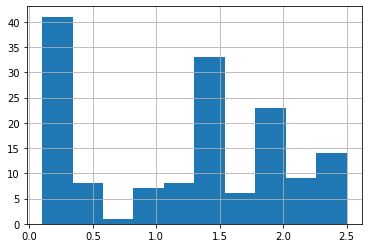

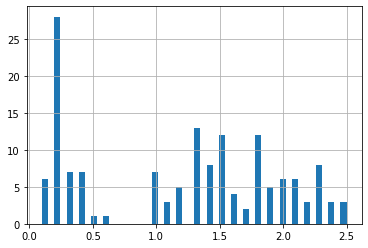

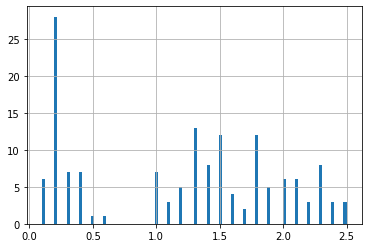

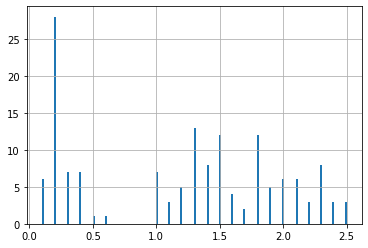

In [58]:
hist_bins = [2,4,8,10,50,100,150]
import matplotlib.pyplot as plt
for b in hist_bins:
    iris_data.hist(bins=b)
    plt.show()

In [60]:
from scipy import stats
from sklearn.neighbors import KernelDensity
iris_data.shape

(150,)

## Q4 比较Kde中的bandwidth

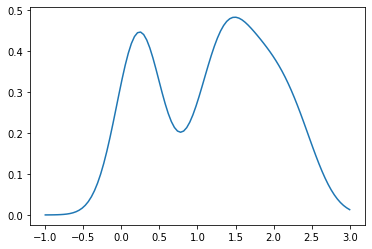

In [64]:
import numpy as np
x = np.linspace(-1,3,100)
# 非参数估计KDE使用iris_data生成stats.gaussian_kde(iris_data)函数
plt.plot(x,stats.gaussian_kde(iris_data)(x))

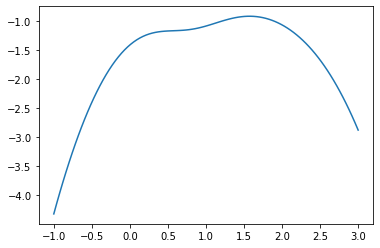

In [62]:
stats.gaussian_kde(iris_data)
# KernelDensity(*, bandwidth=1.0, algorithm='auto', kernel='gaussian', metric='euclidean')为默认参数，并且，先fit
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(np.array(iris_data).reshape((-1,1)))
# sklearn.neighbors.KernelDensity.score_samples的作用是估计数据密度取对数 Evaluate the log density model on the data.
plt.plot(x,kde.score_samples(x.reshape(-1,1)))

In [71]:
# scipy.stats.gaussian_kde(dataset, bw_method=None, weights=None)
kde = stats.gaussian_kde(iris_data, bw_method=0.5)
kde2 = KernelDensity(kernel='gaussian', \
                     bandwidth=0.5).fit(np.array(iris_data).reshape(-1,1))

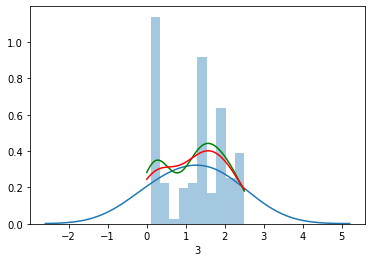

In [72]:
x = np.linspace(0,2.5,1000)

sns.distplot(iris_data,bins=10,kde_kws = {'bw':0.9})
plt.plot(x, kde(x), c='g')
plt.plot(x, np.exp(kde2.score_samples(x.reshape(-1,1))),c='r')


## Q5 比较概率分布的测试算法Kullback-Leibler (KL)散度
 把M is the distribution given by the mixture of 2 Gaussians分别和：  
· histogram model (H1) for this data with 20 bins  
· kernel density estimators K1 with the default kernel width value  
· kernel density estimators K2 with a width value equal to half the default value  
进行比较  
### KL散度定义为
$D_{KL}(p||q) = Σ_i p(x_i) log \frac{p(x_i)}{q(x_i)}$

In [88]:
x1 = np.random.randn(30,1)
x2 = 5+np.random.randn(30,1)

x = np.vstack((x1,x2))

In [89]:
import scipy.stats
hist = np.histogram(x, bins=20)
# 生成H1的模型
hist_dist = scipy.stats.rv_histogram(hist)

In [76]:
class NormalPdf:
    def __init__(self,mu, std):
        self.mu = mu
        self.std = std
        
    def __call__(self,x):
        diff = (x - self.mu)*(x-self.mu)
        return 1/(np.sqrt(2*np.pi)*self.std) \
                * np.exp(-(diff/(2*self.std*self.std)))

class MixtureOfGaussians:
    def __init__(self, gaussians, priors = None):
        self._gaussians = gaussians
        self._priors = priors if priors is not None\
                        else [1/len(gaussians)]*len(gaussians)
    
    def __call__(self, x):
        return sum([self._priors[i]*self._gaussians[i](x)\
                    for i in range(len(self._gaussians))])

In [90]:
gaussians = [NormalPdf(0,1), NormalPdf(5,1)]
############ 生成高斯混合模型M，这里的MixtureOfGaussians支持多个高斯分布
MM = MixtureOfGaussians(gaussians)

x_in = np.linspace(min(x), max(x),100)

In [91]:
def kl_divergence(p,q,x):
    return np.sum(p(x)*np.log(p(x)/np.maximum(q(x),1e-15)))

In [92]:
# 定义两个bandwidth为默认值和其二分之一的kde模型K1,K2
kde = stats.gaussian_kde(x.reshape(-1))
kde2 = stats.gaussian_kde(x.reshape(-1),bw_method=kde.factor/2)

print("hist divergence: ",kl_divergence(MM, hist_dist.pdf, x_in))
print("kde divergence: ",kl_divergence(MM, kde, x_in.reshape(-1)))
print("kde2 divergence: ",kl_divergence(MM, kde2, x_in.reshape(-1)))

hist divergence:  14.356131396242297
kde divergence:  1.5005545703156888
kde2 divergence:  0.42924437228137224


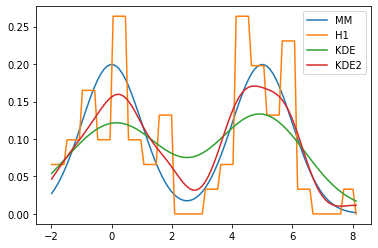

In [93]:
plt.plot(x_in, MM(x_in), label="MM")
plt.plot(x_in, hist_dist.pdf(x_in),label="H1")
plt.plot(x_in, kde(x_in.reshape(-1)),label="KDE")
plt.plot(x_in, kde2(x_in.reshape(-1)),label="KDE2")
plt.legend()

KL散度（Kullback–Leibler divergence）又称KL距离，相对熵。当P(x)和Q(x)的相似度越高，KL散度越小。  
L散度主要有两个性质：
  
（1）不对称性
  
尽管KL散度从直观上是个度量或距离函数，但它并不是一个真正的度量或者距离，因为它不具有对称性，即D(P||Q)!=D(Q||P)。
  
（2）非负性
  
相对熵的值是非负值，即D(P||Q)>0。